<a href="https://colab.research.google.com/github/mudesir/DS-Unit-2-Applied-Modeling/blob/master/Unit_2_Build_Mudesir_Suleyman3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Unit 2 Build up
## Hotel booking demand Dataset  (kaggle)

## Description of Varibels in the columns

Variable | Description
--- | ---
ADR | Average Daily Rate
Adults | Number of Adults
Agent	|	ID of the travel agency
ArrivalDateDayOfMonth	|	Day of the month of the arrival date	
ArrivalDateMonth	|	Month of arrival date
ArrivalDateWeekNumber	| Week number of the arrival date	
ArrivalDateYear	|	Year of arrival date
AssignedRoomType	|	Code for the type of room assigned to the booking
Babies	|	Number of babies	
BookingChanges	|	Number of changes
Children	|	Number of children	
Company	|	ID of the company made the booking
Country	|	Country of origin 
CustomerType	|	Type of booking
DaysInWaitingList	|	Number of days the booking was in the waiting list 
DepositType	|	Indication on if the customer made a deposit to guarantee the booking
DistributionChannel	|	Booking distribution channel
IsCanceled	|	Value indicating if the booking was canceled 
IsRepeatedGuest	|	Value indicating if the booking name was from a repeated guest 
LeadTime	|	Number of days that elapsed between the entering and the arrival date			
MarketSegment	|	Market segment designation
Meal	|	Type of meal booked
PreviousBookingsNotCanceled	|	Number of previous bookings not cancelled
PreviousCancellations	|	Number of previous bookings that were cancelled 
RequiredCardParkingSpaces	|	Number of car parking spaces required by the customer	
ReservationStatus	|	Reservation last status
ReservationStatusDate	|	Date at which the last status was set
ReservedRoomType	|	Code of room type reserved
AssignedRoomType | Code of room type assigned
StaysInWeekendNights	|	Number of weekend nights 
StaysInWeekNights	|	Number of week nights 
TotalOfSpecialRequests	|	Number of special requests made by the customer 

# ROC-AUC

## ROC

When you have a **binary classification** problem, the ROC is a good way to decide what probability threshold you should use when making your predictions. 

Why? Because it let's you see what happens to your **True Positive Rate** and your **False Positive Rate** when you adjust that threshold.

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving hotel_reserve.zip to hotel_reserve.zip


## Import Data / EDA

In [ ]:
data = pd.read_csv('hotel_reserve.zip')
# X = pd.DataFrame(data['data'], columns=data['feature_name'])
# y = pd.Series(data['target'], name='is_canceled')

In [ ]:
import pandas as pd
import numpy as np

data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# change resrvation_status date to date 
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data['reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

In [ ]:
# Split data into train and test avoid leakage of information
# from test to train or from target to features and clean
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, train_size=0.8, test_size=0.2, random_state=42)
train.shape, test.shape


((95512, 32), (23878, 32))

In [ ]:
# Split train into train and val
train, val = train_test_split(train, train_size=0.8, test_size=0.2, random_state=42)
train.shape, val.shape ,test.shape

((76409, 32), (19103, 32), (23878, 32))

In [ ]:
def wrangle(X):
  X=X.copy()
  # drop with high cardinality and with high nan value
  X = X.drop(columns=['reservation_status', 'country', 'agent', 'company', 
                      'reservation_status', 'adr'])
  X = X.dropna()
  return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [ ]:
# print shape
print('Train shape: ', train.shape)
print('Val shape: ', val.shape)
print('Test shape: ', test.shape)


Train shape:  (76405, 27)
Val shape:  (19103, 27)
Test shape:  (23878, 27)


In [ ]:
# get target and features
target = 'is_canceled'
features = train.drop(columns=[target])
features = features.select_dtypes(include='number').columns.tolist()

In [ ]:
y = data[target]

In [ ]:
# How is the target distrbuted
# how many classes it have
print('number of class', y.nunique())

# Are the classes imbalance what is the baseline
y.value_counts(normalize=True)

number of class 2


0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [ ]:
features

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
!pip install --upgrade category_encoders
!pip install category_encoders==2.*
!pip install eli5

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.main import main
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/main.py", line 13, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/cli/autocompletion.py", line 11, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/cli/main_parser.py", line 7, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/cli/cmdoptions.py", line 25, in <module>
    from pip._internal.locations import USER_CACHE_DIR, get_src_prefix
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/locations.py", line 18, in <module>
    from pip._internal.utils import appdirs
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/utils/appdirs.py", line 16, 

In [ ]:
import pandas as pd

import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

#test = test.drop(columns=[target])
#X_test = test
# fit on train
pipeline.fit(X_train, y_train)

# score on val
print('Logistic Regression Validation Accuracy :', pipeline.score(X_val, y_val))



Logistic Regression Validation Accuracy : 0.7304088363084332


In [ ]:
%matplotlib inline
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier


pipeline_dtc = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(max_depth=3)
)

pipeline_dtc.fit(X_train, y_train)
print('Validation Accuracy', pipeline_dtc.score(X_val, y_val))

Validation Accuracy 0.6980578966654453


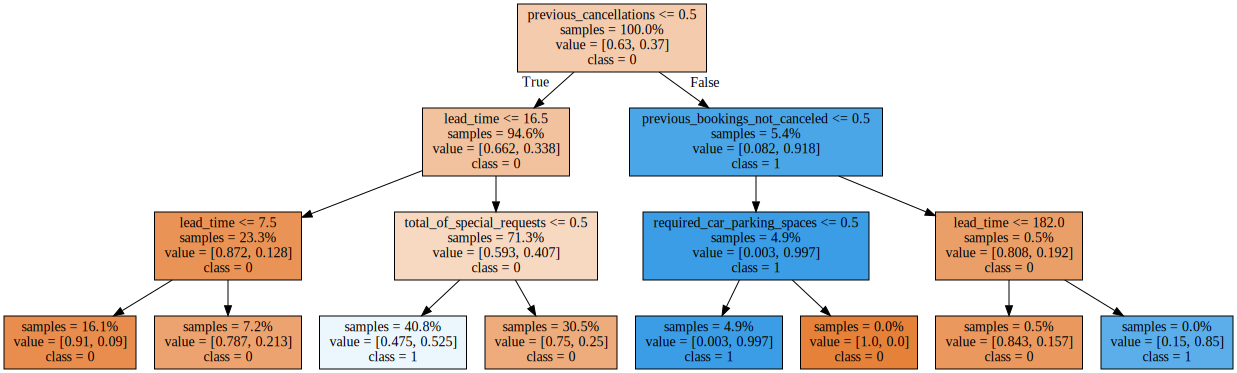

In [ ]:
# plot tree
import graphviz
from sklearn.tree import export_graphviz

model = pipeline_dtc.named_steps['decisiontreeclassifier']
encoder = pipeline_dtc.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns

dot_data = export_graphviz(model, 
                           out_file=None,
                           max_depth=3,
                           feature_names=encoded_columns,
                           class_names=y_train.unique().astype(str),
                           impurity=False,
                           filled=True,
                           proportion=True)
display(graphviz.Source(dot_data))

In [ ]:
# evaluation
# majority class occurs 63%
y.value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
)
# fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8300266973773753


### Permutation and Boosting

In [ ]:
# basline
y_train.value_counts(normalize=True) 

0    0.630194
1    0.369806
Name: is_canceled, dtype: float64

In [ ]:
pipeline

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                      

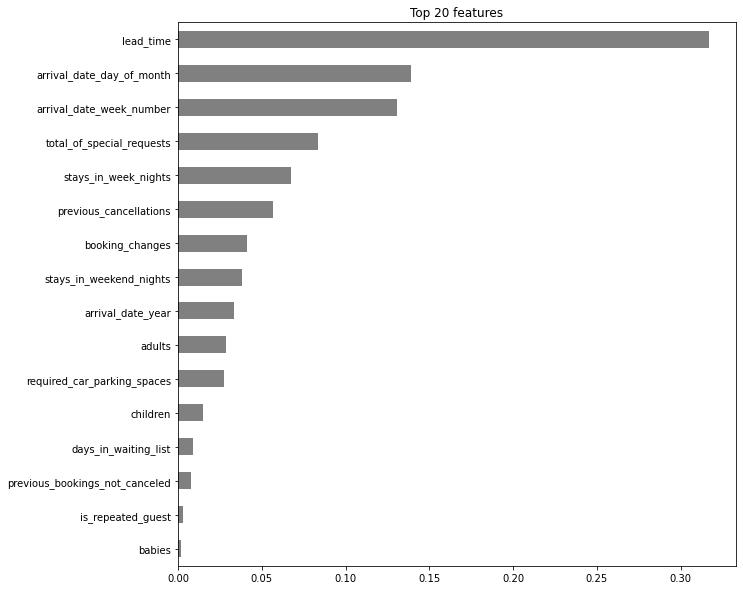

In [ ]:
c
# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [ ]:
# The best in theory, but too slow in practice

column  = 'lead_time'

### Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

### Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

### Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without lead_time: 0.7809244621263676
Validation Accuracy with lead_time: 0.8305501753651259
Drop-Column Importance for lead_time: 0.04962571323875831


In [ ]:
# Permutation Importance
feature = 'lead_time'
X_val[feature].value_counts()

0      1008
1       581
2       325
4       280
3       262
       ... 
354       1
608       1
460       1
517       1
345       1
Name: lead_time, Length: 452, dtype: int64

In [ ]:
X_val[feature].head()

117752     13
23383       1
108866    194
98811     159
67456     214
Name: lead_time, dtype: int64

In [ ]:
X_val_shuffled = X_val.copy()

In [ ]:
X_val_shuffled[feature] = np.random.permutation(X_val[feature])

In [ ]:
X_val_shuffled[feature].head()

117752     99
23383     186
108866    332
98811       0
67456       0
Name: lead_time, dtype: int64

In [ ]:
score_with = pipeline.score(X_val, y_val)
score_permuted = pipeline.score(X_val_shuffled, y_val)

print(f'Validation Accuracy with {feature}: {score_with}')
print(f'Validation Accuracy with {feature} permuted: {score_permuted}')
print(f'Permutation Importance: {score_with - score_permuted}')

Validation Accuracy with lead_time: 0.8305501753651259
Validation Accuracy with lead_time permuted: 0.7203057111448463
Permutation Importance: 0.11024446422027956


In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
result = permutation_importance(pipeline, X_val, y_val, 
                                n_repeats=5, random_state=0)

In [ ]:
df = pd.DataFrame({'feature': X_val.columns,
                   'importances_mean': np.round(result['importances_mean'], 3),
                   'importances_std': result['importances_std']})

In [ ]:
df.sort_values(by='importances_mean', ascending=False)

,feature,importances_mean,importances_std
0,lead_time,0.117,0.001811
15,total_of_special_requests,0.099,0.002606
1,arrival_date_year,0.059,0.001577
10,previous_cancellations,0.055,0.000796
2,arrival_date_week_number,0.052,0.001090
5,stays_in_week_nights,0.046,0.000925
4,stays_in_weekend_nights,0.032,0.000698
12,booking_changes,0.032,0.001258
3,arrival_date_day_of_month,0.030,0.001517
6,adults,0.020,0.000889


## With eli5 

In [ ]:
# eli5 doesn't work with pipelines
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [ ]:
features = X_val.columns.to_list()
pd.Series(permuter.feature_importances_, features).sort_values(ascending=False)

lead_time                         0.113951
total_of_special_requests         0.098194
arrival_date_year                 0.060336
previous_cancellations            0.055091
arrival_date_week_number          0.054023
stays_in_week_nights              0.043983
stays_in_weekend_nights           0.031482
booking_changes                   0.030938
arrival_date_day_of_month         0.029357
adults                            0.019002
required_car_parking_spaces       0.018563
children                          0.005486
previous_bookings_not_canceled    0.005308
days_in_waiting_list              0.005130
is_repeated_guest                 0.000942
babies                            0.000262
dtype: float64

In [ ]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist()
)

Weight,Feature
0.1140 ± 0.0048,lead_time
0.0982 ± 0.0032,total_of_special_requests
0.0603 ± 0.0040,arrival_date_year
0.0551 ± 0.0017,previous_cancellations
0.0540 ± 0.0035,arrival_date_week_number
0.0440 ± 0.0055,stays_in_week_nights
0.0315 ± 0.0026,stays_in_weekend_nights
0.0309 ± 0.0024,booking_changes
0.0294 ± 0.0020,arrival_date_day_of_month
0.0190 ± 0.0012,adults


**bold text**##We can use importances for feature selection
For example, we can remove features with zero importance. The model trains faster and the score does not decrease

In [ ]:
print('Shape before removing features', X_train.shape)

Shape before removing features (76405, 16)


In [ ]:
minimum_importance = 0.003
mask = permuter.feature_importances_>minimum_importance
mask

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True])

In [ ]:
features = X_train.columns[mask]
X_train_selected = X_train[features]
X_train_selected.shape

(76405, 14)

In [ ]:
X_val_selected = X_val[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
# Fit on train, score on val
pipeline.fit(X_train_selected, y_train)
print('Validation Accuracy ', pipeline.score(X_val_selected, y_val))

Validation Accuracy  0.8297649583835


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    #SimpleImputer(strategy='median'), 
    GradientBoostingClassifier()
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_we

In [ ]:
print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Training Accuracy: 0.7636149466657941
Validation Accuracy: 0.7680469036277024


### Using xgboost for gradient boosting

In [ ]:
from xgboost import XGBClassifier

In [ ]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=6)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=6, nthread=None,
                               objective='binary:logistic', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
       

In [ ]:

print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Training Accuracy: 0.7617040769583142
Validation Accuracy: 0.7663194262681254


*XGBoost* parameters tuning

In [ ]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model = XGBClassifier(
    n_estimators = 1000,
    max_depth=7,
    learning_rate=0.5,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set, 
          eval_metric='error', 
          early_stopping_rounds=10) # Stop if the score hasn't improved in 50 rounds

[0]	validation_0-error:0.240626	validation_1-error:0.237031
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.238008	validation_1-error:0.234413
[2]	validation_0-error:0.235299	validation_1-error:0.231011
[3]	validation_0-error:0.234579	validation_1-error:0.230173
[4]	validation_0-error:0.233427	validation_1-error:0.229754
[5]	validation_0-error:0.232668	validation_1-error:0.22944
[6]	validation_0-error:0.232184	validation_1-error:0.228655
[7]	validation_0-error:0.231045	validation_1-error:0.227713
[8]	validation_0-error:0.228532	validation_1-error:0.226509
[9]	validation_0-error:0.226464	validation_1-error:0.224415
[10]	validation_0-error:0.22509	validation_1-error:0.224153
[11]	validation_0-error:0.219802	validation_1-error:0.219913
[12]	validation_0-error:0.217486	validation_1-error:0.218552
[13]	validation_0-error:0.21619	validation_1-error:0.21708

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

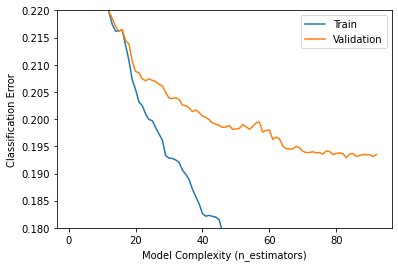

In [ ]:
results = model.evals_result()
train_error = results['validation_0']['error']
val_error = results['validation_1']['error']
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylim((0.18, 0.22)) # Zoom in
plt.legend();

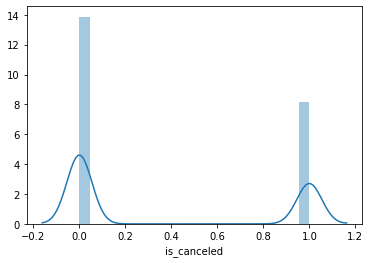

In [ ]:
%matplotlib inline
import seaborn as sns
sns.distplot(y_train);

In [ ]:
# fit random forest
from sklearn.ensemble import RandomForestClassifier
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
)
# fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8300266973773753


In [ ]:
!pip install pdpbox
!pip install shap

     |████████████████████████████████| 57.7MB 68kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=f0c139b78a3b793239dbd4d5061d0ee8431d62f056eda68620153ef18193836c
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
     |████████████████████████████████| 276kB 5.1MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394122 sha256=804593917e8ec875bd53915ed77c7c403ae16cc6ee6b50f1c7d315cee9eaeb04
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [ ]:
plt.rcParams['figure.dpi']=72

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature1 = 'lead_time'
isolated = pdp_isolate(
    model=pipeline,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature1
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


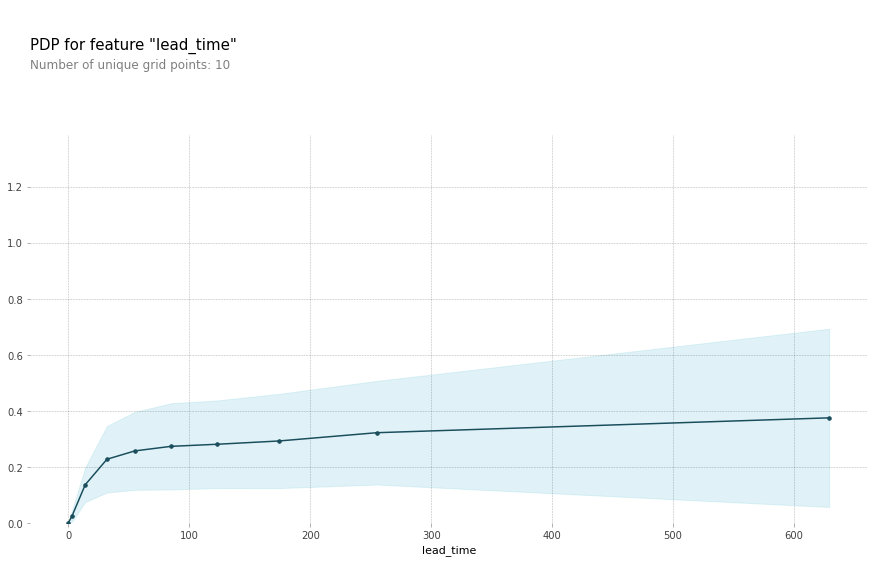

In [ ]:
pdp_plot(isolated, feature_name=feature1);

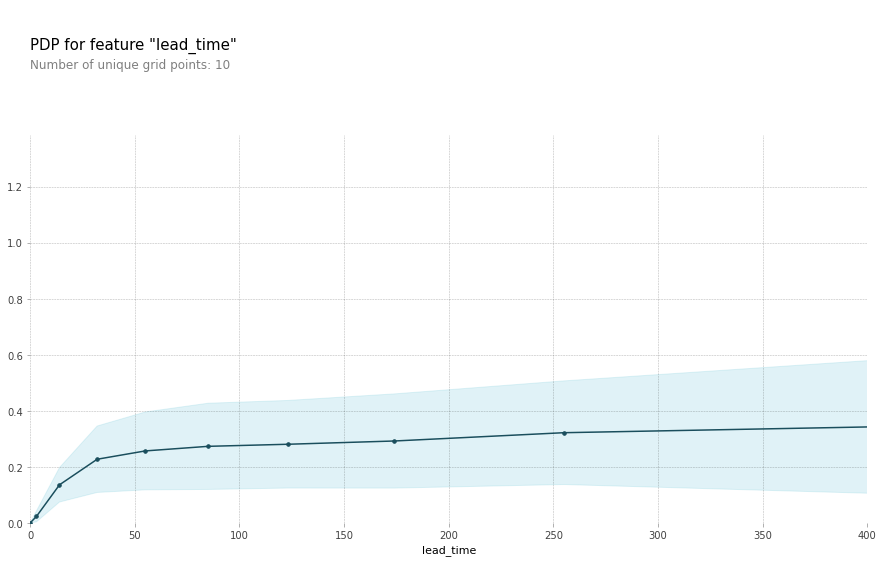

In [ ]:
pdp_plot(isolated, feature_name=feature1)
plt.xlim((0,400));

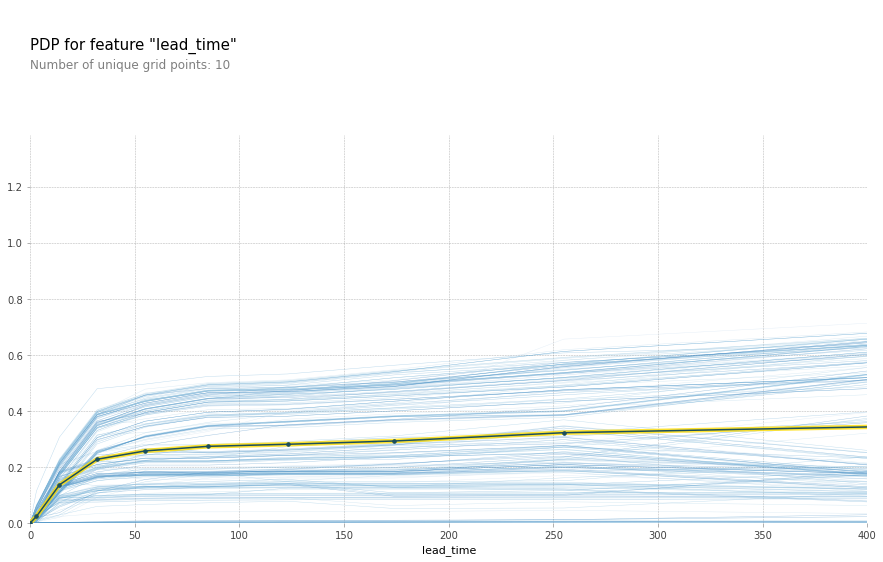

In [ ]:
# add ICE curves
pdp_plot(isolated, feature_name=feature1, plot_lines=True, frac_to_plot=0.01)
plt.xlim((0,400));


In [ ]:
# more grid 
feature1 = 'lead_time'
isolated = pdp_isolate(
    model=pipeline,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature1,
    num_grid_points=30
)

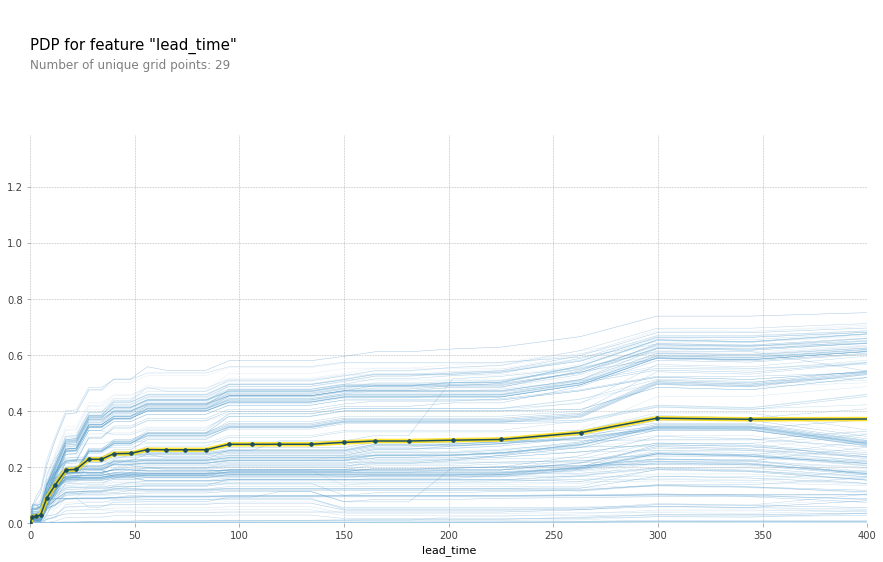

In [ ]:
pdp_plot(isolated, feature_name=feature1, plot_lines=True, frac_to_plot=0.01)
plt.xlim((0,400));

In [ ]:
# 2 features
from pdpbox.pdp import pdp_interact, pdp_interact_plot
features2 = ['lead_time', 'babies']

interact = pdp_isolate(
    model=pipeline,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature1,
)

In [ ]:
pdp = interact.pdp.pivot_table(
    values='preds',
    columns=features2[0],
    index=features2[1]
)[::-1]


AttributeError: ignored

In [ ]:
import plotly.graph_objs as go 
surface = go.Surface(
    x=pdp.columns,
    y=pdp.index,
    z=pdp.values
) 
layout = go.Layout(
    scene=dict(
        xaxis=dict(title=features2[0]),
        yaxis=dict(title=features2[1]),
        zaxis=dict(title=target)
    )
) 
fig = go.Figure(surface, layout)
fig.show()

In [ ]:
from pdpbox import pdp
pdp.np

In [ ]:
# pdp
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
feature1 = 'lead_time'
pdp_dist = pdp.pdp_isolate(
    model=pipeline,
    dataset = X_val_encoded,
    model_features=feature,
    feature=feature1
)

ValueError: ignored

In [ ]:
encoder.mapping

[]